In [1]:
%load_ext autoreload
%autoreload

# Examples of HYCOM utils

These examples show how to use the utilities to read and subsample HYCOM files. Also how to 
read hycom files into xarray datasets.

In [2]:
import numpy as np
from hycom.info import read_field_names
from hycom.io import read_hycom_fields, subset_hycom_field, read_hycom_coords
import matplotlib.pyplot as plt
from os.path import join, exists
import os

input_folder = join('..','test_data')
output_folder = 'output'

## Read and plot HYCOM FILES

The fields available are: ['srfhgt', 'u-vel.', 'temp']


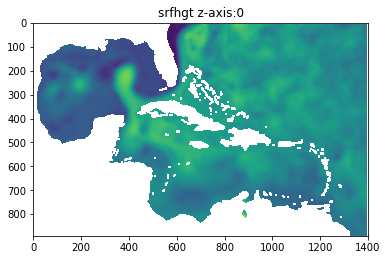

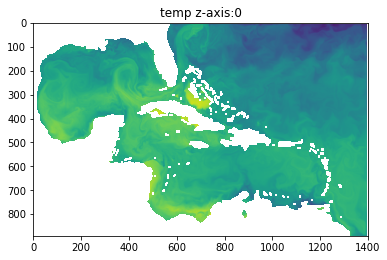

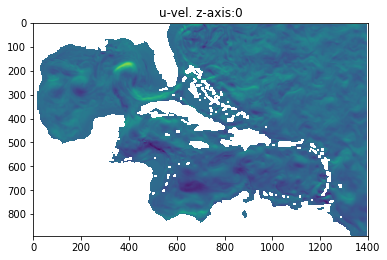

In [3]:
file_name = 'archv.2009_153_00.a'
input_file = join(input_folder, file_name)
layers = [0]  # Depth layers we want to read

# Printing the fields available in the file
print(F"The fields available are: {read_field_names(input_file)}")

# Reading specific field and layers
fields = ['srfhgt', 'temp', 'u-vel.']   # Which fields to plot
hycom_fields = read_hycom_fields(input_file, fields, layers)

# Making plot of the fields
for idx, field in enumerate(fields):
    layers = hycom_fields[field].shape[0]
    for layer in range(layers):
        plt.imshow(np.flip(hycom_fields[field][layer], axis=0))
        plt.title(F"{field} z-axis:{layer}")
        if not (exists(output_folder)):
            os.makedirs(output_folder)
        plt.savefig(join(output_folder, F"{field}_{idx}_{layer}.png"))
        plt.show()

## Subsample HYCOM fields to another file

In [4]:
output_folder = 'output'
file_name = 'archv.2009_153_00.a'
input_file = join(input_folder, file_name)
fields = ['temp']
layers = [0]

output_file = join(output_folder, F"subsampled_{file_name}")
subset_hycom_field(input_file, output_file, fields, layers)
print(F"Done! subsampled file stored at: {output_file}")

Done! subsampled file stored at: output/subsampled_archv.2009_153_00.a


## Reading and plotting HYCOM Coordinates

In [ ]:
file_name = 'regional.grid.a'
input_file = join(input_folder, file_name)

# Printing the fields available in the file
print(F"The available coordinates are: {read_field_names(input_file)}")

# These are all the coordinates in the file
# The definition of the "regional.grid" files is defined in page 9 and 10 of the Hycom User's Guide
fields = ['plon','plat','qlon','qlat','ulon','ulat','vlon','vlat']

hycom_fields = read_hycom_coords(input_file, fields)
# Making plot of the fields
for idx, field in enumerate(fields):
    im = plt.imshow(np.flip(hycom_fields[field], axis=0))
    plt.title(F"{field}")
    if not (exists(output_folder)):
        os.makedirs(output_folder)
    plt.colorbar(im, shrink=.7)
    plt.savefig(join(output_folder, F"Coord_{field}_{idx}.png"))
    plt.show()